In [1]:
%matplotlib notebook
import os
import chaospy as cp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from numpy import linalg as LA
import pandas as pd
import seaborn as sns
import itertools
MODEL_NAME      = 'bch1_norm'
WORKING_DIR     = os.getcwd()
MODEL_DIR       = os.path.join(WORKING_DIR, MODEL_NAME)
MODEL_DIR_DATA  = os.path.join(MODEL_DIR,r'Data')
MODEL_DIR_FIGURE= os.path.join(MODEL_DIR,r'Figures')


## Test function

## Benchmar Probalem #1
Benchmark problem with 1 dimension normal error:

\begin{equation}
  \begin{aligned}
	y&=f(x)+\epsilon(x), \quad f(x) = x^2 + \sin(5x) \\
	x&\sim N(0,1)\\
    \epsilon &\sim N(0,\sigma(x)), \quad \sigma(x) = 0.5(x^2+1)
  \end{aligned}
  \label{eqn:benchmark1}
\end{equation}



In [2]:
def func(x):
    x = np.array(x)
    return x**2*np.sin(5*x)

def sigma_x(x,sigma=0.5):
    x = np.array(x)
    return sigma*(x**2+1)

def func_normal(x,mu=0,sigma=0.5):
    x = np.array(x)
    sigmas = sigma_x(x,sigma=sigma)
    y0 = func(x)
    e = np.array([np.random.normal(mu, sigma,1) for sigma in sigmas]).reshape((len(x),))
    y = y0 + e
    return y

def func_gumbel(x,mu=0,beta=0.5):
    x = np.array(x)
    x0 = x**2*np.sin(5*x)
    e = np.array([np.random.gumbel(mu, beta*abs(s),1) for s in x]).reshape((len(x),))
    mu, std
    return x0+ e

<IPython.core.display.Javascript object>


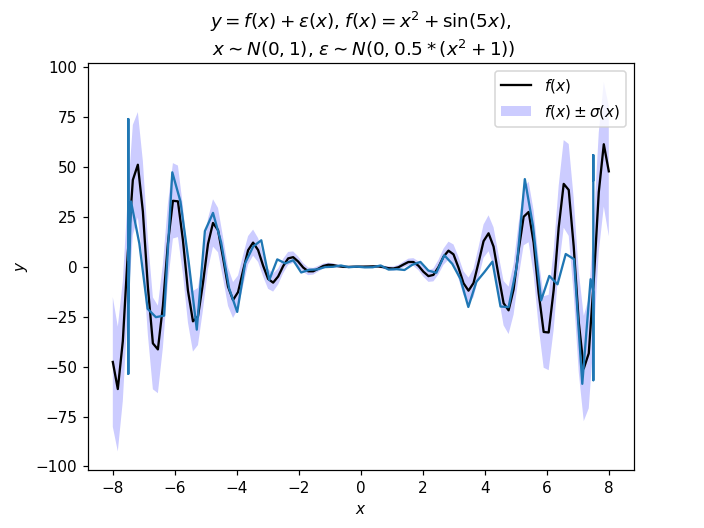

In [40]:
fig = plt.figure()
x = np.linspace(-8,8,100)
y0 = func(x)
sigmas = sigma_x(x)
y = func_normal(x)

ax1 = fig.add_subplot(1,1,1)
ax1.plot(x,y0,'k',label='$f(x)$')
ax1.fill_between(x, y0+sigmas, y0-sigmas, facecolor='blue', alpha=0.2,label='$f(x)\pm \sigma(x)$')
# ax1.plot(x,y0+sigmas,'k-.',label='$f(x)\pm \sigma(x)$')
# ax1.plot(x,y0-sigmas,'k-.')
# plt.plot(x,y,label='$y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('$y=f(x)+\epsilon(x)$, $f(x) = x^2 + \sin(5x)$,\n $x\sim N(0,1)$, $\epsilon \sim N(0,0.5*(x^2+1))$')
ax1.legend()


## Monte Carlo Simulation

In [41]:
data_set = np.load(os.path.join(MODEL_DIR_DATA,r'Quadrature_hermite_doe1.npy'))
training_x = data_set[0]
training_y = data_set[1]

print(data_set.shape)
print(training_x.shape)
print(training_y.shape)

(3, 150, 1)
(150, 1)
(150, 1)


In [42]:
ax1.plot(training_x,training_y)

In [16]:
print(training_x[1][0].shape)
print(training_y[1][0].shape)
domain = cp.Uniform(0,1)
rule = 'e'
order = 3
coord, weights= cp.generate_quadrature(order-1, domain, rule=rule) 
print(coord)

(1, 300)
(1, 300)
[[0.11270167 0.5        0.88729833]]


In [ ]:
nsamples = 10000
dist_x = cp.Normal(0,1)
xsamples = dist_x.sample(nsamples)
ysamples = func_normal(xsamples)
data = np.array([xsamples, ysamples]).T
print(data.shape)
df = pd.DataFrame(data, columns=["x", "y"])
g=(sns.jointplot(x="x", y="y", data=df, kind='reg').plot_joint(sns.kdeplot, zorder=0, n_levels=6));


## Design of Experiments (DoEs)

In [ ]:
dist_zeta  = cp.Normal(0,1)
## ------------------------------------------------------------------- ###
##  Define DoE parameters  ###
## ------------------------------------------------------------------- ###
doe_params = ['GQ','hermite',5] # doe_method, doe_rule, doe_order
doe_method, doe_rule, doe_order = doe_params[0], doe_params[1], doe_params[2]
#### ------------------------------------------------------------------- ###
#### Define meta model parameters  ###
#### ------------------------------------------------------------------- ###
# quad_metamodel   = metaModel('PCE', [5,6], quad_simparam.doe_method, dist_zeta)

samp_zeta = samplegen(doe_method, doe_order, dist_zeta, rule=doe_rule)
zeta_cor, zeta_weights = samp_zeta
phy_cor = dist_transform(dist_zeta, dist_x, zeta_cor)
phy_weights = zeta_weights
samp_phy = np.array([phy_cor, phy_weights])
print(samp_zeta)
print(samp_phy)

## PCE model

In [ ]:
nrealization = 4
nsamples = len(samp_phy)*20
xsamples = np.linspace(-3,3,nsamples)
ysamples = np.array([func_normal(xsamples) for _ in np.arange(nrealization)]).T
print(ysamples.shape)

In [ ]:
## Gumbel distribution
# nsamples = 1000
# gumbel_mu, gumbel_beta = 0, 1
# xsamples = np.random.gumbel(gumbel_mu, gumbel_beta,nsamples)
# fig = plt.figure()
# count, bins, ignored = plt.hist(xsamples, 40,density=True)
# plt.plot(bins, (1/gumbel_beta)*np.exp(-(bins - gumbel_mu)/gumbel_beta) * np.exp( -np.exp( -(bins - gumbel_mu) /gumbel_beta))
#           ,linewidth=2, color='r')
# plt.show()

In [29]:
a = 1
for _ in np.arange(10):
    a +=1
    print(a)

2
3
4
5
6
7
8
9
10
11
